In [108]:
##READING THE DATA

In [109]:
import pandas as pd

In [110]:
import numpy as np

In [111]:
import matplotlib.pyplot as plt

In [112]:
df_x = pd.read_csv('./data/linearX.csv')

In [113]:
df_y = pd.read_csv('./data/linearY.csv')

In [114]:
#print(df_x)
#print(df_x.shape)
dfx = df_x.values
dfy = df_y.values

In [115]:
x = dfx.reshape((-1,))
y = dfy.reshape((-1,))
#print(dfx.shape)
#print(dfx.shape)
#print(x)

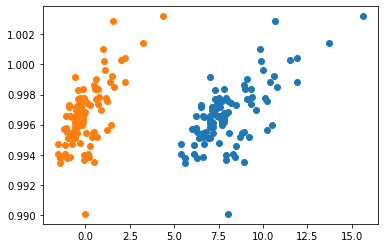

In [116]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

In [92]:
##FUNCTION DEFINITIONS

In [117]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

In [118]:
def error(X,Y,theta):
     
    error = 0
    for i in range(X.shape[0]):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error

In [119]:
def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad

In [120]:
def gradientDescent(x,y,learning_rate=0.001):
    
    theta = np.array([0.0,0.0])
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(x,y,theta)
        err = error(x,y,theta)
        error_list.append(err)
        theta_list.append((theta[0],theta[1]))
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        itr += 1
        
    return theta,error_list,theta_list

In [121]:
final_theta, error_list, theta_list = gradient_descent(X,Y)

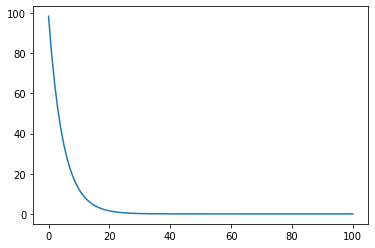

In [122]:
plt.plot(error_list)
plt.show()

In [123]:
print(final_theta)

[0.99660749 0.0013579 ]


In [124]:
xtest = np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


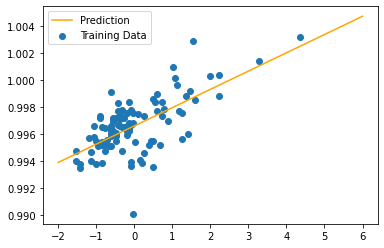

In [125]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()